In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os as os
import rasterio
from sklearn.feature_extraction import image

(3, 1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)


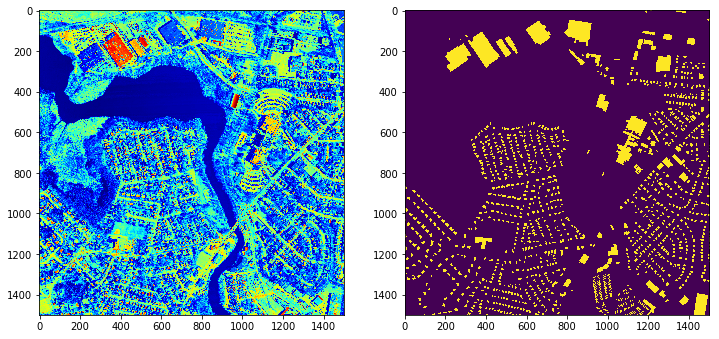

In [106]:
# load input and output images
input_path = 'buildings/input.tiff'
with rasterio.open(input_path) as src:
    inp_all = src.read()
out_path = 'buildings/output.tif'
with rasterio.open(out_path) as src:
    out = src.read()
fig = plt.figure(figsize=(12, 7))
inp_image = np.sum(inp_all, axis = 0)
fig.add_subplot(1, 2, 1)
plt.imshow(inp_image, cmap='jet')
fig.add_subplot(1, 2, 2)
plt.imshow(out[0])
print(inp_all.shape)
for i in range(3):
    print (inp_all[i].shape)

In [127]:
def make_samples(inp_image, out_image, num, size):
    random_state = np.random.randint(0, 1e6, size = 1)[0]
    num_bands = 3
    ipatches_all = np.zeros((num, size[0], size[1], num_bands))
    for i in range(num_bands):
        ipatches_all[:, :, :, i] = image.extract_patches_2d(inp_image[i], size, max_patches = num, random_state = random_state)
    opatches = image.extract_patches_2d(out_image, size, max_patches = num, random_state = random_state)
    return ipatches_all, opatches[:, :, :, np.newaxis]

num_patches = 10
ipatches, opatches = make_samples(inp_all, out[0], num_patches, [512, 512])
print(ipatches.shape)
print(opatches.shape)
np.savez('tiny.npz', inp=ipatches, outp=opatches)

(10, 512, 512, 3)
(10, 512, 512, 1)


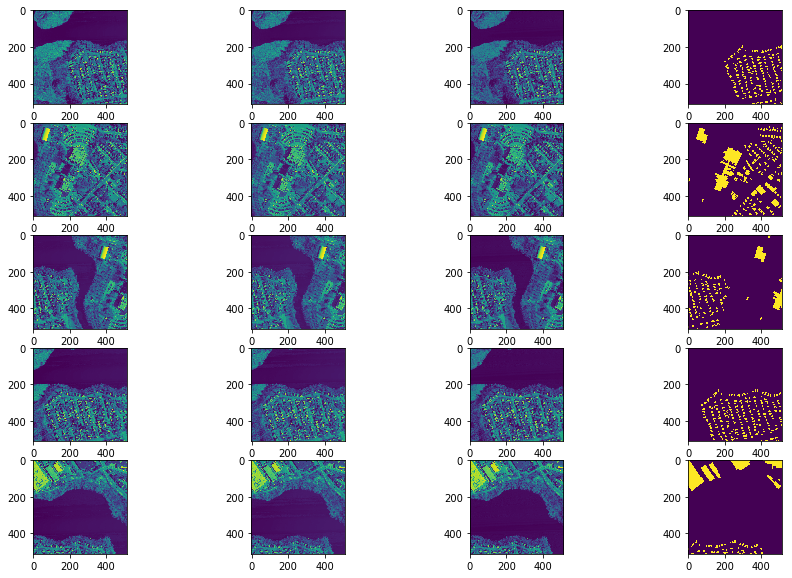

In [126]:
fig = plt.figure(figsize=(15, 10))
count = 1
for i in range(num_patches):
    for j in range(3):
        fig.add_subplot(num_patches, 4, count)
        plt.imshow(ipatches[i, :, :, j])
        count += 1
    fig.add_subplot(num_patches, 4, count)
    plt.imshow(opatches[i, :, :, 0])
    count += 1
    

In [128]:
a = np.load('tiny.npz')

In [129]:

inp = a['inp']